In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
classes[9]

'truck'

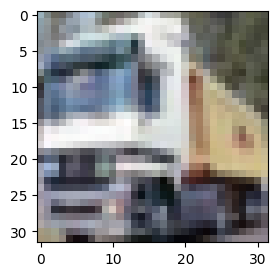

In [14]:
plt.figure(figsize=(12,3))
plt.imshow(X_train[1])

In [15]:
def plot_sample(X, y, index):
    plt.figure(figsize=(12,3))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

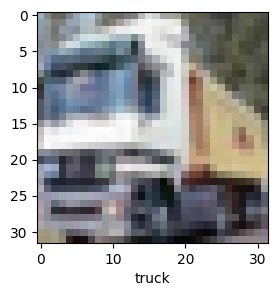

In [16]:
plot_sample(X_train, y_train, 1)

In [17]:
y_train[1]

9

In [18]:
X_train = X_train/255    #each pixel ranges from 0 to 255, we are normalizing the pixel values by dividing with 255
X_test = X_test/255

In [19]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [20]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 98s 60ms/step - loss: 1.8096 - accuracy: 0.3568
Epoch 2/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.6213 - accuracy: 0.4271
Epoch 3/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5398 - accuracy: 0.4588
Epoch 4/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4796 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.4304 - accuracy: 0.4954


In [21]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.4410 - accuracy: 0.4917


[1.4410209655761719, 0.4916999936103821]

In [22]:
from sklearn.metrics import classification_report

y_pred = ann.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]

print(classification_report(y_test, y_pred_class))

313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.54      0.60      0.57      1000
           1       0.64      0.59      0.61      1000
           2       0.48      0.18      0.26      1000
           3       0.31      0.47      0.38      1000
           4       0.44      0.39      0.41      1000
           5       0.43      0.34      0.38      1000
           6       0.59      0.45      0.51      1000
           7       0.43      0.70      0.53      1000
           8       0.60      0.64      0.62      1000
           9       0.58      0.57      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.48     10000
weighted avg       0.50      0.49      0.48     10000



In [23]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [24]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [25]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 59s 29ms/step - loss: 1.4937 - accuracy: 0.4604
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.1334 - accuracy: 0.6025
Epoch 3/10
1563/1563 [==============================] - 48s 30ms/step - loss: 0.9915 - accuracy: 0.6546
Epoch 4/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.9074 - accuracy: 0.6863
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8410 - accuracy: 0.7096
Epoch 6/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7841 - accuracy: 0.7282
Epoch 7/10
1563/1563 [==============================] - 42s 27ms/step - loss: 0.7372 - accuracy: 0.7460
Epoch 8/10
1563/1563 [==============================] - 43s 27ms/step - loss: 0.6934 - accuracy: 0.7610
Epoch 9/10
1563/1563 [==============================] - 43s 28ms/step - loss: 0.6530 - accuracy: 0.7749
Epoch 10/10
1563/1563 [==============================] - 43s 28m

In [26]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.8791 - accuracy: 0.7027


[0.8790968060493469, 0.7027000188827515]

In [27]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [28]:
y_test = y_test.reshape(-1, )
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

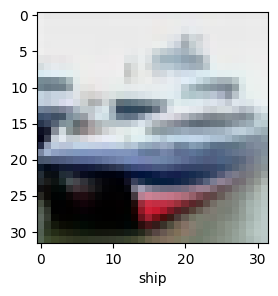

In [29]:
plot_sample(X_test,y_test,1)

In [30]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[8.0250856e-04, 1.7227187e-04, 2.0459206e-03, 8.2911807e-01,
        1.9405027e-04, 1.5443936e-01, 1.0751279e-02, 2.8533676e-05,
        2.3477387e-03, 1.0031333e-04],
       [7.9039135e-05, 1.6947076e-04, 3.3674814e-06, 3.9399424e-07,
        7.1792030e-09, 1.9444503e-08, 3.0125772e-08, 1.3220743e-10,
        9.9974221e-01, 5.4276065e-06],
       [7.1156576e-02, 1.5188786e-01, 1.1948249e-03, 6.9518347e-04,
        2.3233112e-04, 1.0904791e-04, 9.1526701e-05, 6.8136817e-04,
        7.7019215e-01, 3.7591064e-03],
       [5.9300554e-01, 3.0437693e-02, 4.1714039e-02, 7.3017795e-03,
        4.5373659e-03, 6.4665690e-04, 2.6330676e-05, 6.0436508e-04,
        3.1913629e-01, 2.5900181e-03],
       [6.1523584e-05, 2.2053189e-04, 7.8271434e-02, 9.6204445e-02,
        4.2349759e-01, 4.7224951e-03, 3.9677265e-01, 5.1242400e-06,
        2.4386897e-04, 2.8230045e-07]], dtype=float32)

In [31]:
y_class = [np.argmax(element) for element in y_pred]
y_class[:5]

[3, 8, 8, 0, 4]

In [32]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

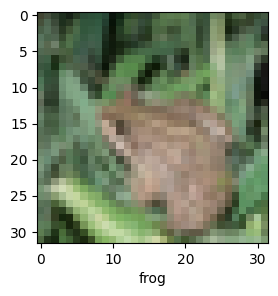

In [35]:
plot_sample(X_test, y_test, 4)

In [36]:
classes[y_class[4]]

'deer'

In [37]:
print(classification_report(y_test, y_class))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      1000
           1       0.81      0.82      0.82      1000
           2       0.60      0.59      0.59      1000
           3       0.48      0.61      0.54      1000
           4       0.66      0.64      0.65      1000
           5       0.67      0.51      0.58      1000
           6       0.76      0.78      0.77      1000
           7       0.75      0.75      0.75      1000
           8       0.81      0.80      0.80      1000
           9       0.82      0.74      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

